In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Credit-Risk-Modelling/Datasets/loan_data_clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32574 entries, 0 to 32573
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  object 
 3   person_emp_length           32574 non-null  float64
 4   loan_intent                 32574 non-null  object 
 5   loan_grade                  32574 non-null  object 
 6   loan_amnt                   32574 non-null  int64  
 7   loan_int_rate               32574 non-null  float64
 8   loan_status                 32574 non-null  int64  
 9   loan_percent_income         32574 non-null  float64
 10  cb_person_default_on_file   32574 non-null  object 
 11  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32574.0,27.718426,6.204987,20.00,23.00,26.00,30.00,94.00
person_income,32574.0,65878.480813,52531.938809,4000.00,38500.00,55000.00,79200.00,2039784.00
person_emp_length,32574.0,4.760576,3.981181,0.00,2.00,4.00,7.00,41.00
loan_amnt,32574.0,9588.018051,6320.249598,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,32574.0,11.009470,3.081664,5.42,8.49,10.99,13.11,23.22
loan_status,32574.0,0.218180,0.413017,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32574.0,0.170202,0.106755,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32574.0,5.804108,4.053873,2.00,3.00,4.00,8.00,30.00


### Simple Logistic Regression using only one feature

In [5]:
X = df[['loan_int_rate']]
y = df[['loan_status']]

In [6]:
one_param = LogisticRegression(random_state=2).fit(X, np.ravel(y))

In [7]:
one_param.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 2,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [8]:
one_param.intercept_

array([-4.42067035])

##### Add more features

In [9]:
X = df[['loan_int_rate', 'person_emp_length']]
y = df[['loan_status']]

In [10]:
two_param = LogisticRegression(random_state=2).fit(X, np.ravel(y))

In [11]:
two_param.intercept_

array([-4.17793465])

this model has an .intercept_ value closer to zero. 
<br>This means the log odds of a non-default is approaching zero.

## Use train, test and add more features

In [12]:
X = df[['loan_int_rate', 'person_emp_length', 'person_income']]
y = df[['loan_status']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)

In [14]:
multi_param = LogisticRegression(random_state=2).fit(X_train, np.ravel(y_train))

In [15]:
multi_param.coef_

array([[ 8.20256019e-02, -6.46164736e-02, -3.21720652e-05]])

In [16]:
multi_param.intercept_

array([-0.01330487])

Checking how different features change the models coefficients 

In [17]:
X1 = df[['person_income', 'person_emp_length', 'loan_amnt']]
X2 = df[['person_income', 'loan_percent_income', 'cb_person_cred_hist_length']]
y = df[['loan_status']]

In [18]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.4, random_state=2)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.4, random_state=2)


In [19]:
# # Print the first five rows of each training set
# print(X1_train.head())
# print(X2_train.head())

# Create and train a model on the first training data
clf_logistic1 = LogisticRegression(random_state=2).fit(X1_train, np.ravel(y_train))

# Create and train a model on the second training data
clf_logistic2 = LogisticRegression(random_state=2).fit(X2_train, np.ravel(y_train))

# Print the coefficients of each model
print(X1_train.columns.tolist())
print(clf_logistic1.coef_)
print(X2_train.columns.tolist())
print(clf_logistic2.coef_)

['person_income', 'person_emp_length', 'loan_amnt']
[[-4.04170076e-05 -2.47903721e-08  1.05890562e-04]]
['person_income', 'loan_percent_income', 'cb_person_cred_hist_length']
[[-2.19806239e-05  8.77434901e-11 -1.51437635e-09]]


Notice that the coefficient for the person_income changed when we changed the data from X1 to X2

<hr/>

The coefficients determined by a Logistic Regression model can be used to interpret the relative importance of each feature in predicting the class of a data sample.<br>

There are three values in .coef_? This tells you how important each column, or feature, was for predicting. <br>The more positive the value, the more it predicts defaults.


<hr/>

### Since where are going yo use all the data available
#### One hot encoding for object variables

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32574 entries, 0 to 32573
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  object 
 3   person_emp_length           32574 non-null  float64
 4   loan_intent                 32574 non-null  object 
 5   loan_grade                  32574 non-null  object 
 6   loan_amnt                   32574 non-null  int64  
 7   loan_int_rate               32574 non-null  float64
 8   loan_status                 32574 non-null  int64  
 9   loan_percent_income         32574 non-null  float64
 10  cb_person_default_on_file   32574 non-null  object 
 11  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [21]:
one_hot = pd.get_dummies(df)

In [22]:
one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32574 entries, 0 to 32573
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32574 non-null  int64  
 1   person_income                   32574 non-null  int64  
 2   person_emp_length               32574 non-null  float64
 3   loan_amnt                       32574 non-null  int64  
 4   loan_int_rate                   32574 non-null  float64
 5   loan_status                     32574 non-null  int64  
 6   loan_percent_income             32574 non-null  float64
 7   cb_person_cred_hist_length      32574 non-null  int64  
 8   person_home_ownership_MORTGAGE  32574 non-null  uint8  
 9   person_home_ownership_OTHER     32574 non-null  uint8  
 10  person_home_ownership_OWN       32574 non-null  uint8  
 11  person_home_ownership_RENT      32574 non-null  uint8  
 12  loan_intent_DEBTCONSOLIDATION   

In [23]:
one_hot['loan_intent_HOMEIMPROVEMENT'].value_counts()

0    28969
1     3605
Name: loan_intent_HOMEIMPROVEMENT, dtype: int64

In [24]:
df['loan_intent'].value_counts()

EDUCATION            6451
MEDICAL              6071
VENTURE              5716
PERSONAL             5519
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [25]:
# save encoded data to csv
one_hot.to_csv(r'/Credit-Risk-Modelling/Datasets/loan_data_encoded.csv', 
               encoding='utf-8', index=False)


Make new predictions, with this new data

In [26]:
X = one_hot.drop('loan_status', axis=1)
y = one_hot[['loan_status']]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=2)

In [28]:
prob = LogisticRegression(random_state=2).fit(X_train, np.ravel(y_train))

In [29]:
predictions = prob.predict_proba(X_test)  # prob show as two arrays: non-default, default
predictions

array([[0.70587826, 0.29412174],
       [0.69089599, 0.30910401],
       [0.85547436, 0.14452564],
       ...,
       [0.89343909, 0.10656091],
       [0.86143578, 0.13856422],
       [0.94065815, 0.05934185]])

In [ ]:
np.savetxt('/Credit-Risk-Modelling/Datasets/lr_prob_predictions.csv', predictions ,delimiter=',')

In [30]:
preds_df = pd.DataFrame(predictions[:,1][0:100], columns = ['prob_default'])
true_df = y_test.head(100)

# Concatenate and print the two data frames for comparison
sample_df = pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1)
sample_df

,loan_status,prob_default
0,0,0.294122
1,0,0.309104
2,0,0.144526
3,0,0.277623
4,0,0.359972
...,...,...
95,0,0.250345
96,1,0.545125
97,0,0.309400
98,0,0.036508


In [31]:
# check how model predict vs actual default loans
sample_df[sample_df['loan_status'] == 1]

,loan_status,prob_default
16,1,0.327125
23,1,0.463678
26,1,0.233394
28,1,0.387282
35,1,0.502015
48,1,0.519382
56,1,0.260150
59,1,0.046566
63,1,0.456344
64,1,0.079295


most of the rows with loan_status at 1 have a low probability of default.

## Credit model performance

In [32]:
# model accuracy
prob.score(X_test, y_test)

0.8070606293169609

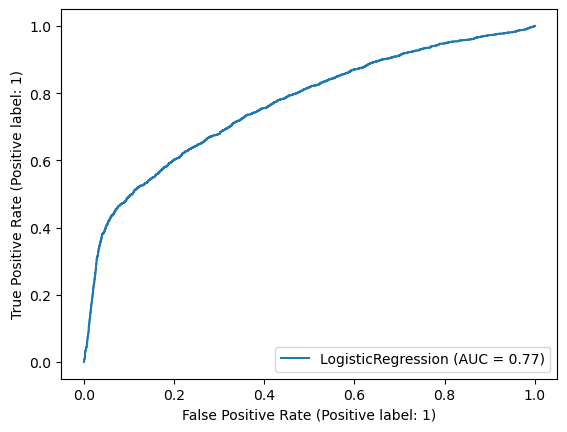

In [33]:
log_display = RocCurveDisplay.from_estimator(prob, X_test, y_test)
plt.show()

In [34]:
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(predictions[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)

# Print the row counts for each loan status
# print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89     10215
     Default       0.74      0.16      0.27      2815

    accuracy                           0.81     13030
   macro avg       0.78      0.57      0.58     13030
weighted avg       0.80      0.81      0.76     13030



In [35]:
precision_recall_fscore_support(y_test, preds_df['loan_status'])

(array([0.81044908, 0.7400319 ]),
 array([0.98404307, 0.16483126]),
 array([0.88884959, 0.26961069]),
 array([10215,  2815], dtype=int64))

In [36]:
precision_recall_fscore_support(y_test, preds_df['loan_status'])[1][1]


0.16483126110124333

### Confussion Matrix
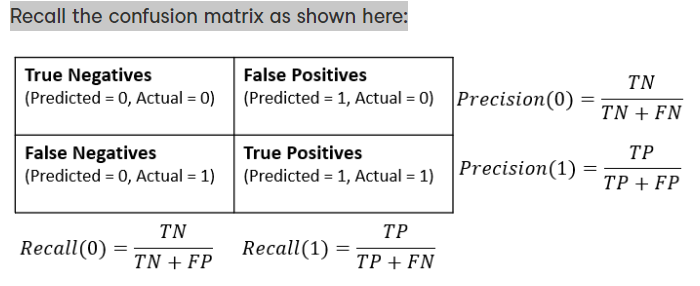

prob is model
preds_df are predic

In [37]:
preds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13030 entries, 0 to 13029
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   prob_default  13030 non-null  float64
 1   loan_status   13030 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 203.7 KB


In [38]:
preds_df

,prob_default,loan_status
0,0.294122,0
1,0.309104,0
2,0.144526,0
3,0.277623,0
4,0.359972,0
...,...,...
13025,0.260644,0
13026,0.017401,0
13027,0.106561,0
13028,0.138564,0


In [39]:
preds_df['loan_status'].value_counts()

0    12403
1      627
Name: loan_status, dtype: int64

In [40]:
confusion_matrix(y_test, preds_df['loan_status'])

array([[10052,   163],
       [ 2351,   464]], dtype=int64)

* a lot of false negatives.
* true positives are low.
* recall is also bad. only 16%.

Check how changing threshold affect the model performance.

In [41]:
# Set the threshold for defaults to 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

In [42]:
preds_df['loan_status'].value_counts()

0    10983
1     2047
Name: loan_status, dtype: int64

In [43]:
confusion_matrix(y_test, preds_df['loan_status'])

array([[9459,  756],
       [1524, 1291]], dtype=int64)